In [32]:
import pandas as pd
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [33]:
data = pd.read_csv('petrol_consumption.csv')
#print(data)

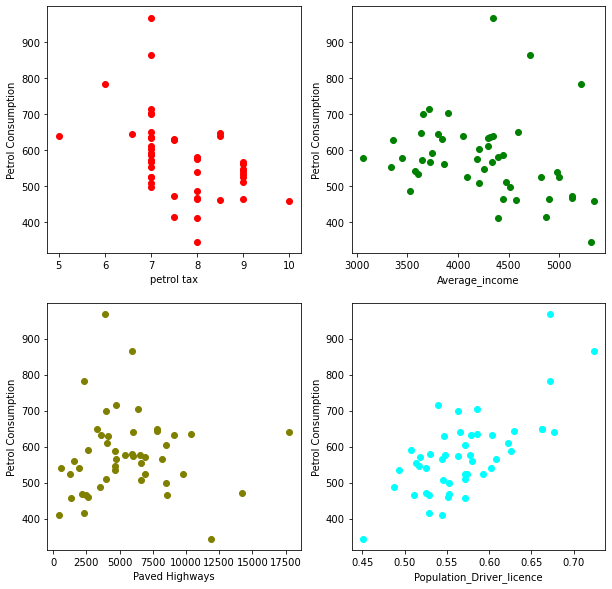

In [34]:
figure_size = (10,10)
plt.figure( figsize = figure_size )
plt.subplot(2,2,1)
plt.scatter( data['Petrol_tax'], data['Petrol_Consumption'],color = 'red' )
plt.xlabel("petrol tax")
plt.ylabel("Petrol Consumption")

plt.subplot(2,2,2)
plt.scatter( data['Average_income'], data['Petrol_Consumption'],color = 'green' )
plt.xlabel("Average_income")
plt.ylabel("Petrol Consumption")

plt.subplot(2,2,3)
plt.scatter( data['Paved_Highways'], data['Petrol_Consumption'],color = 'olive' )
plt.xlabel("Paved Highways")
plt.ylabel("Petrol Consumption")

plt.subplot(2,2,4)
plt.scatter( data['Population_Driver_licence(%)'], data['Petrol_Consumption'],color = 'cyan' )
plt.xlabel("Population_Driver_licence")
plt.ylabel("Petrol Consumption")

plt.show()

In [35]:
# Create X label
X = np.array(data.drop(['Petrol_Consumption'], 1))
#print(X)
# Create Y label
Y = np.array(data.drop(['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'], 1))
#print(Y)

In [42]:
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33, 4) (33, 1)
(15, 4) (15, 1)


In [55]:
print(X_train[0])

polynomial_equation = PolynomialFeatures(degree = 2)
input_X_train = polynomial_equation.fit_transform(X_train)
print(polynomial_equation)
print(input_X_train[0].shape)

a = polynomial_equation.get_feature_names()
print(a)

input_X_test = polynomial_equation.fit_transform(X_test)
print("Input of testing data : {}".format(input_X_test))

[8.000e+00 4.391e+03 5.939e+03 5.300e-01]
PolynomialFeatures()
(15,)
['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']
Input of testing data : [[1.00000000e+00 7.00000000e+00 4.29600000e+03 4.08300000e+03
  6.23000000e-01 4.90000000e+01 3.00720000e+04 2.85810000e+04
  4.36100000e+00 1.84556160e+07 1.75405680e+07 2.67640800e+03
  1.66708890e+07 2.54370900e+03 3.88129000e-01]
 [1.00000000e+00 9.00000000e+00 3.60100000e+03 4.65000000e+03
  4.93000000e-01 8.10000000e+01 3.24090000e+04 4.18500000e+04
  4.43700000e+00 1.29672010e+07 1.67446500e+07 1.77529300e+03
  2.16225000e+07 2.29245000e+03 2.43049000e-01]
 [1.00000000e+00 5.00000000e+00 4.04500000e+03 1.77820000e+04
  5.66000000e-01 2.50000000e+01 2.02250000e+04 8.89100000e+04
  2.83000000e+00 1.63620250e+07 7.19281900e+07 2.28947000e+03
  3.16199524e+08 1.00646120e+04 3.20356000e-01]
 [1.00000000e+00 7.50000000e+00 3.35700000e+03 4.12100000e+03
  5.47000000e-01 5.62500000

In [56]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(input_X_train, Y_train)

In [57]:
#y = (m1 * x1 + m2  * x2 + m3 * x3 + m4 * x4) + b
#b = y-intercept
#m1 = slope of a line representing relation between x1(petrol tax) and y(petrol consumption)
#m2 = slope of a line representing relation between x2(average income) and y(petrol consumption)
#m3 = slope of a line representing relation between x3(paved highways) and y(petrol consumption)
#m4 = slope of a line representing relation between x4(population driver licence) and y(petrol consumption)
#get linear regression coefficients
slope = reg.coef_
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : [[ 0.00000000e+00  1.19454078e+02 -4.70926365e-01  3.97529204e-02
   1.20060123e+04  5.02432928e+00  8.68485060e-02  6.65745073e-03
  -1.12158388e+03 -4.67707804e-05  6.09269370e-06  6.88983986e-02
  -1.58696018e-06 -1.85540467e-01 -9.25622288e+02]], Intercept : [-2413.96815224]


In [58]:
def my_prediction(x,y,m,b):
    predicted_train= np.zeros(y.shape)
    
    for i in range(len((x))):
        for j in range(len(x[i])):
            predicted_train[i] += (m[0][j] * x[i][j]) 
        predicted_train[i]  += b
    return predicted_train

a= my_prediction(input_X_train,Y_train, slope, intercept)
b= my_prediction(input_X_test,Y_test, slope, intercept)

#print("training data : {} testing data : {}".format(a,b))



(33, 4)
(33, 1)


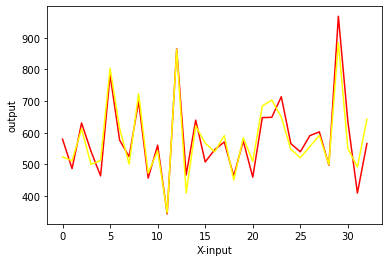

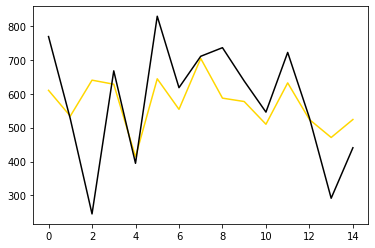

In [59]:
print(X_train.shape)
print(a.shape)


#plt.scatter(X_train, Y_train, color = 'red')
#plt.scatter(X_test, Y_test, color = 'coral')
plt.xlabel('X-input')
plt.ylabel('output')
plt.plot(Y_train, color = 'red')
plt.plot(a, color = 'yellow')
plt.show()

plt.plot(Y_test, color ='gold')
plt.plot(b, color = 'black')

plt.show()

In [60]:
#print(Y_test[0])
testing_accuracy = reg.score(input_X_test,Y_test)
training_accuracy = reg.score(input_X_train,Y_train)
print("Testing data : {},Training data : {}".format(testing_accuracy,training_accuracy))
#accuracy_score(X_test,Y_test)

Testing data : -2.6414738642544906,Training data : 0.8829962465979395
